## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [2]:
dataset_train = pd.read_csv('Desktop/Yahoo_Finance.csv')

In [3]:
training_set1=dataset_train[0:1258]
testing_set1=dataset_train[1258:]

In [4]:
training_set = training_set1.iloc[:, 4:5].values
testing_set = testing_set1.iloc[:, 4:5].values

## Pre-preocessing the Dataset

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.        ],
       [0.03224044],
       [0.01202186],
       ...,
       [0.73114754],
       [0.83442623],
       [0.81693989]])

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## LSTM Implementation

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from tensorflow.python.framework import ops
ops.reset_default_graph()

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 14s 11ms/sample - loss: 0.0509
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0108
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0084
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0082
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/sample - loss: 0.0071
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0069
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0067
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0063
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/sample - loss: 0.0065
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0061
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0056
Epoch 12/100
1198/1198 [====

In [10]:
dataset_test = testing_set1
real_stock_price = dataset_test.iloc[:, 4:5].values

## Predicting the Output

In [38]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(61, 563):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualizing the Output

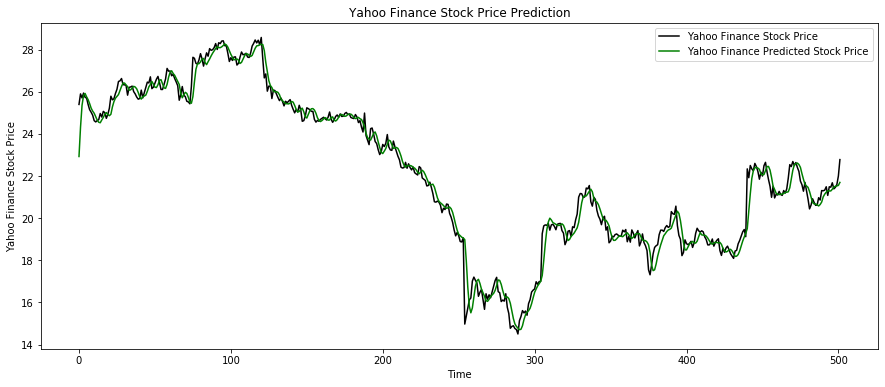

In [49]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

plt.plot(real_stock_price, color = 'black', label = 'Yahoo Finance Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Yahoo Finance Predicted Stock Price')
plt.title('Yahoo Finance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Yahoo Finance Stock Price')
plt.legend()
plt.show()

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_set_rmse = (np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
test_set_r2 = r2_score(real_stock_price, predicted_stock_price)

In [43]:
print(test_set_rmse)

0.5048125514001949


In [48]:
print(test_set_r2)

0.9942564447
